In [80]:
import pandas as pd
import numpy as no
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import pickle

In [81]:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [82]:
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [83]:
pf=ProfileReport(df)

In [84]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [85]:
df["BMI"]=df["BMI"].replace(0,df["BMI"].mean())

In [86]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [87]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [88]:
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].mean())

In [89]:
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].mean())

In [90]:
df["Glucose"]=df["Glucose"].replace(0,df["Glucose"].mean())

In [91]:
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].mean())

In [92]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

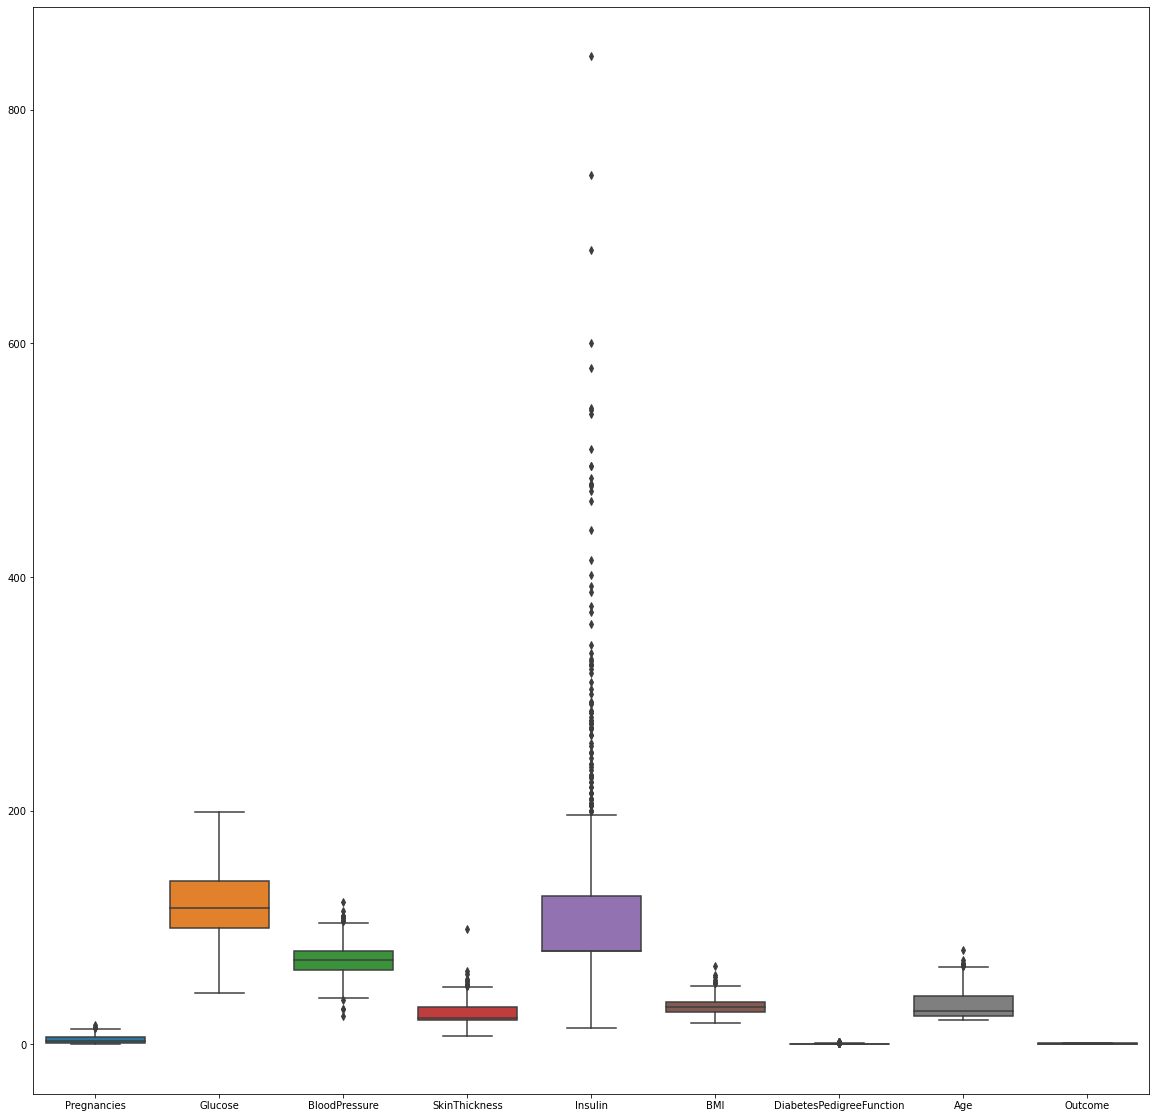

In [93]:
# Finding outliers
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=df,ax=ax)

In [94]:
q=df["Insulin"].quantile(0.70)
df_new=df[df["Insulin"]<q]

In [95]:
df_new

Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
0              6    148.0           72.0      35.000000  79.799479  33.6   
1              1     85.0           66.0      29.000000  79.799479  26.6   
2              8    183.0           64.0      20.536458  79.799479  23.3   
3              1     89.0           66.0      23.000000  94.000000  28.1   
5              5    116.0           74.0      20.536458  79.799479  25.6   
..           ...      ...            ...            ...        ...   ...   
761            9    170.0           74.0      31.000000  79.799479  44.0   
762            9     89.0           62.0      20.536458  79.799479  22.5   
764            2    122.0           70.0      27.000000  79.799479  36.8   
766            1    126.0           60.0      20.536458  79.799479  30.1   
767            1     93.0           70.0      31.000000  79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
5                       0.201   30        0  
..                        ...  ...      ...  
761                     0.403   43        1  
762                     0.142   33        0  
764                     0.340   27        0  
766                     0.349   47        1  
767                     0.315   23        0  

[536 rows x 9 columns]

<AxesSubplot:>

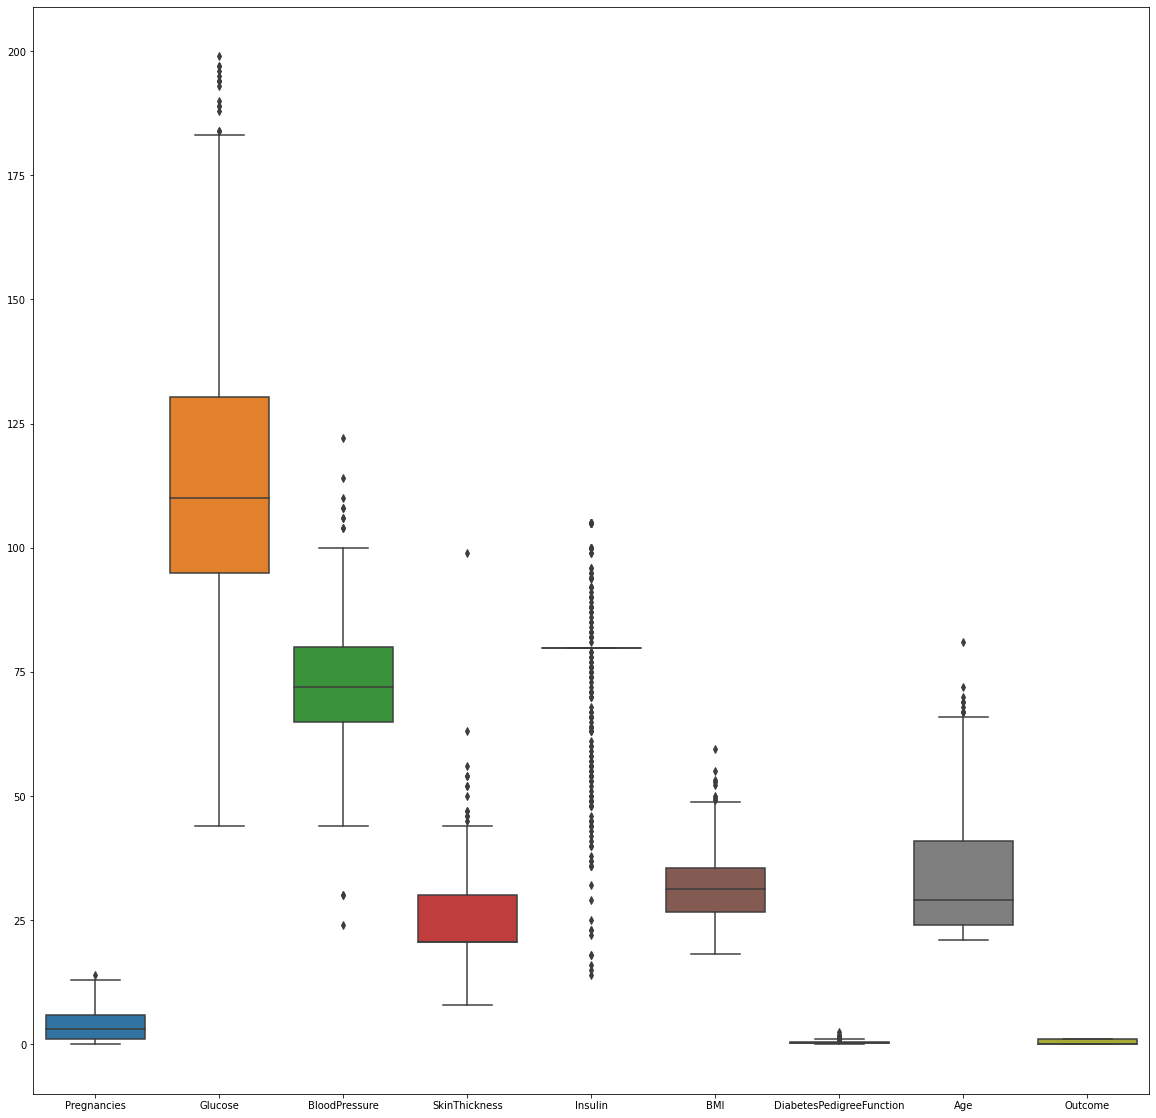

In [96]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=df_new,ax=ax)

In [97]:
q=df["Pregnancies"].quantile(0.98)
df_new=df[df["Pregnancies"]<q]

In [98]:
df_new

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[745 rows x 9 columns]

In [99]:
q = df_new['BMI'].quantile(.99)
df_new = df_new[df_new['BMI']< q]

q = df_new['SkinThickness'].quantile(.99)
df_new = df_new[df_new['SkinThickness']< q]

q = df_new['Insulin'].quantile(.95)
df_new = df_new[df_new['Insulin']< q]

q = df_new['DiabetesPedigreeFunction'].quantile(.99)
df_new = df_new[df_new['DiabetesPedigreeFunction']< q]


q = df_new['Age'].quantile(.99)
df_new = df_new[df_new['Age']< q]


<AxesSubplot:>

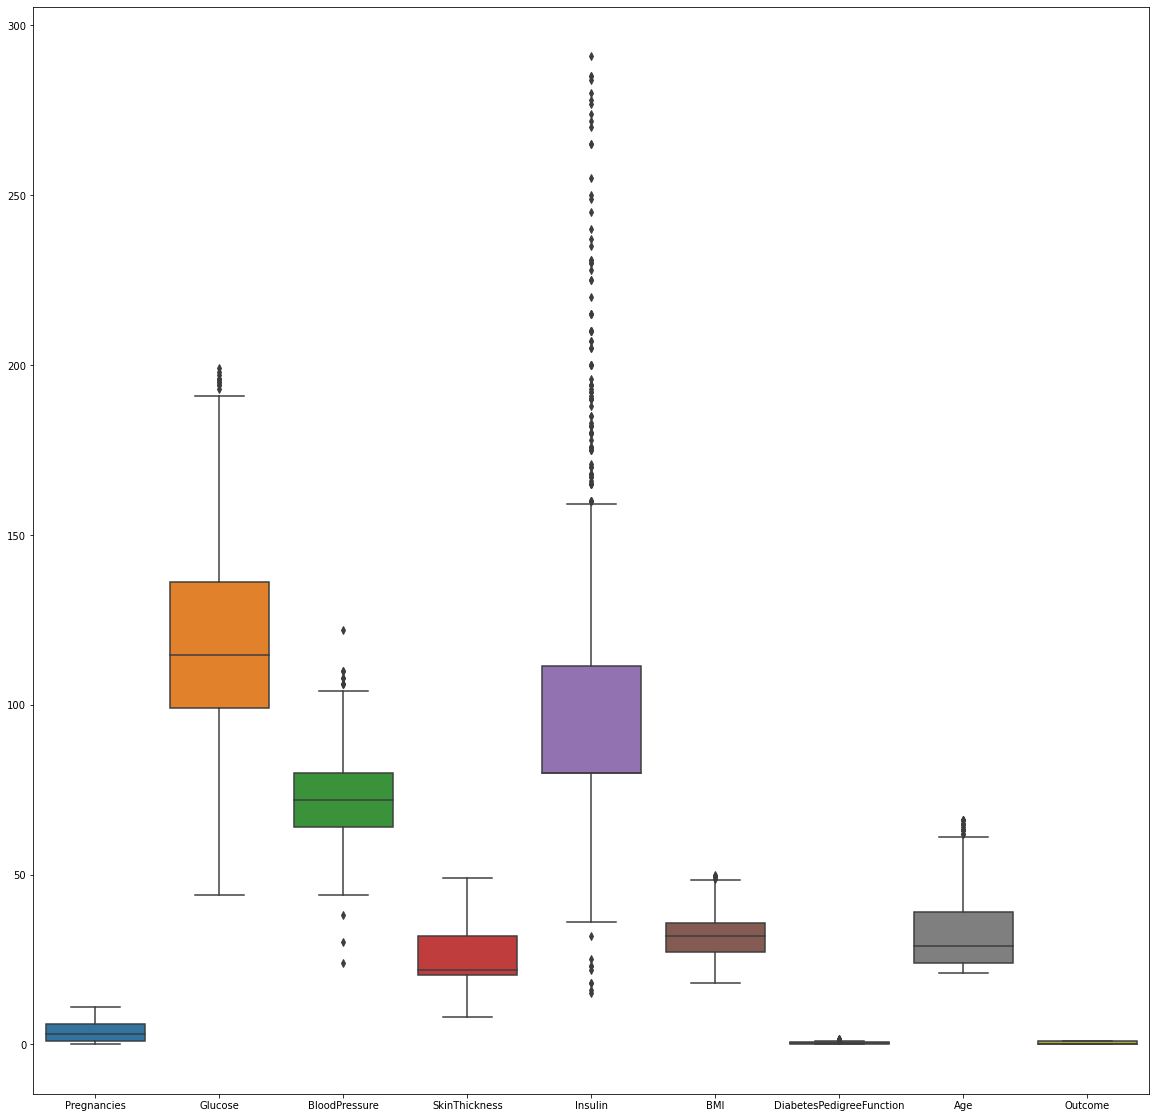

In [100]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=df_new,ax=ax)

In [101]:
ProfileReport(df_new)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
# Best code to remove outlier
def outlier_removal(self,data):
        def outlier_limits(col):
            Q3, Q1 = np.nanpercentile(col, [75,25])
            IQR= Q3-Q1
            UL= Q3+1.5*IQR
            LL= Q1-1.5*IQR
            return UL, LL

        for column in data.columns:
            if data[column].dtype != 'int64':
                UL, LL= outlier_limits(data[column])
                data[column]= np.where((data[column] > UL) | (data[column] < LL), np.nan, data[column])

        return data


In [24]:
df_new

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
5              5    116.0           74.0      20.536458   79.799479  25.6   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
5                       0.201   30        0  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[674 rows x 9 columns]

In [102]:
Y=df_new["Outcome"]

In [103]:
X=df_new.drop(columns=["Outcome"])

In [104]:
X

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
5              5    116.0           74.0      20.536458   79.799479  25.6   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
5                       0.201   30  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[674 rows x 8 columns]

In [105]:
# Normalizing it with standardscaler
scalar=StandardScaler()
scaled_dataset=scalar.fit_transform(X)
scaled_dataset

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

<AxesSubplot:>

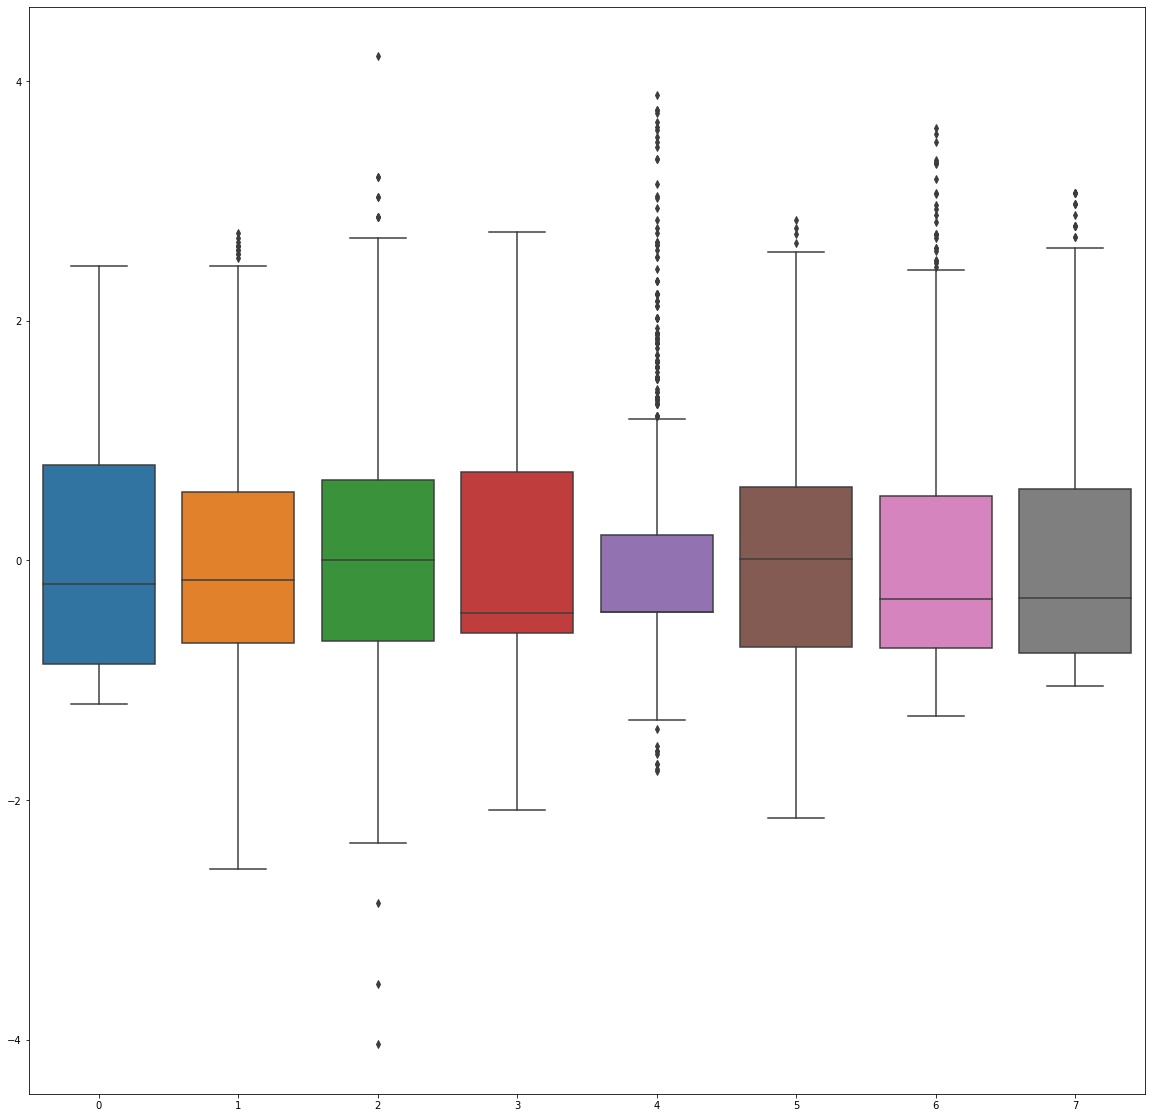

In [106]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=scaled_dataset,ax=ax)

In [107]:
scaled_dataset

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

In [108]:
Y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 674, dtype: int64

In [109]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])


In [110]:
# We see that there is no multicollinearity 
# If the score is greater than 10 i,e vif score then we can remove that particular column
vif_score(X)

FEATURE  VIF_SCORE
0               Pregnancies   1.449056
1                   Glucose   1.304263
2             BloodPressure   1.262686
3             SkinThickness   1.470049
4                   Insulin   1.271017
5                       BMI   1.513160
6  DiabetesPedigreeFunction   1.042300
7                       Age   1.662728

In [130]:
X_train,X_test,Y_train,Y_test=train_test_split(scaled_dataset,Y,test_size=0.20)

In [131]:
X_train

array([[-1.19710303, -0.0074294 , -0.50447449, ...,  1.08093056,
        -0.66093307, -0.95413254],
       [-0.20017456, -0.5886028 , -2.35587388, ..., -0.17308623,
        -0.16612361, -0.58905429],
       [ 1.46137289, -0.41766945,  0.67368875, ..., -1.14494923,
         1.43411126,  0.1411022 ],
       ...,
       [-0.20017456,  2.52238426, -0.16785642, ...,  0.46959738,
        -0.72410024, -0.68032385],
       [-1.19710303,  2.38563757,  2.69339717, ...,  0.37554612,
        -0.04329856,  0.77998913],
       [-0.53248405, -0.72534949, -1.0094016 , ...,  0.43824696,
        -0.87499958, -0.95413254]])

In [132]:
logr_libnear=LogisticRegression(verbose=1,solver="liblinear")

In [133]:
logr_libnear.fit(X_train,Y_train)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [134]:
logr_libnear.predict([X_test[0]])

array([0], dtype=int64)

In [135]:
#  This is the probability that it is 0 is 0.99165 and 1 is 0.00834
logr_libnear.predict_proba([X_test[1]])

array([[0.19293291, 0.80706709]])

In [136]:
logr_libnear.predict_log_proba([X_test[0]])

array([[-0.14981717, -1.97231314]])

In [137]:
logr_libnear.predict([X_test[9]])

array([0], dtype=int64)

In [138]:
Y_test.iloc[6]

1

In [139]:
Y_test

640    0
595    1
585    0
430    0
132    1
      ..
362    0
313    0
209    1
536    0
504    0
Name: Outcome, Length: 135, dtype: int64

In [140]:
logr=LogisticRegression(verbose=1)

In [141]:
logr.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [142]:
logr.predict([X_test[0]])

array([0], dtype=int64)

In [143]:
logr.predict_proba([X_test[0]])

array([[0.86268786, 0.13731214]])

In [144]:
Y_pred_libnear=logr_libnear.predict(X_test)

In [145]:
Y_pred_libnear

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [146]:
Y_pred_default=logr.predict(X_test)

In [147]:
Y_pred_default

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [148]:
confusion_matrix(Y_test,Y_pred_libnear)

array([[98,  7],
       [11, 19]], dtype=int64)

In [149]:
confusion_matrix(Y_test,Y_pred_default)

array([[98,  7],
       [11, 19]], dtype=int64)

In [150]:
# Code to find all the required data
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result
model_eval(Y_test,Y_pred_libnear)

{'Accuracy': 0.8666666666666667,
 'Precision': 0.7307692307692307,
 'Recall': 0.6333333333333333,
 'Specficity': 0.9333333333333333,
 'F1': 0.6785714285714285}

In [151]:
confusion_matrix(Y_test,Y_pred_libnear)

array([[98,  7],
       [11, 19]], dtype=int64)

In [161]:
auc=roc_auc_score(Y_test,Y_pred_libnear)
auc

0.7833333333333333

In [162]:
fpr, tpr, thresholds  = roc_curve(Y_test,Y_pred_libnear)

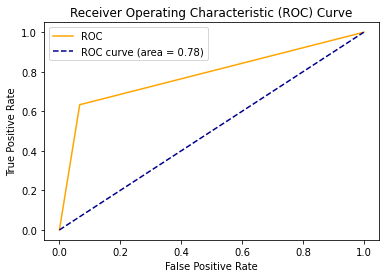

In [163]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()